## Let's do some python coding =D
import usefull libraries:

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
iris_df = pd.read_csv('iris.csv')
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We use permutation from np.random to split the data randomly.

In [4]:
iris_data = np.random.permutation(iris_df)
iris_data[:5]

array([[6.7, 3.0, 5.2, 2.3, 'virginica'],
       [6.8, 3.2, 5.9, 2.3, 'virginica'],
       [6.1, 2.6, 5.6, 1.4, 'virginica'],
       [7.0, 3.2, 4.7, 1.4, 'versicolor'],
       [6.0, 2.7, 5.1, 1.6, 'versicolor']], dtype=object)

In [6]:
X = iris_data[:,:4]
y = iris_data[:,4:]
X[1,:]

array([6.8, 3.2, 5.9, 2.3], dtype=object)

In [7]:
# let's split x and make train and test from that

boundary = int(len(X) * 0.9)
X_train, X_test = X[:boundary], X[boundary:]
y_train, y_test = y[:boundary], y[boundary:]

Visualizing our data by reducing instance dimensions from 4 to 2 because we can't still see 4D plots in 20th century :)

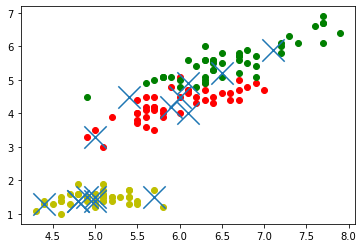

In [8]:
to_plot = []
counter = 0
for iclass in {'setosa', 'versicolor', 'virginica'}:
    to_plot.append([[], [], []])
    for i in range(len(X_train)):
        if y_train[i] == iclass:
            to_plot[counter][0].append(sum(X_train[i,0:1]))
            to_plot[counter][1].append(sum(X_train[i,2:3]))
    counter+=1
    
to_plot.append([[], [], []])
for i in range(len(X_test)):
    to_plot[3][0].append(sum(X_test[i,0:1]))
    to_plot[3][1].append(sum(X_test[i,2:3]))

colors = ('r', 'g', 'y')

for iclass in range(3):
    plt.scatter(to_plot[iclass][0], to_plot[iclass][1], c=colors[iclass])

plt.scatter(to_plot[3][0], to_plot[3][1], marker='x', s=500)
plt.show()

To determine the similarity between two instances, we need a distance function. In our example, the Euclidean distance is ideal:

In [9]:
def distance(instance1, instance2):
    instance1 = np.array(instance1)
    instance2 = np.array(instance2)
    return np.linalg.norm(instance1 - instance2)
    

print(distance([3, 5], [0, 1]))
print(distance(X[0], X[1]))

5.0
0.7348469228349536


Here it is how norm is calculated:
$$
||A|| = [ \sum _{i,j} abs(a_{i,j})^2 ]^ \frac {1}{2}
$$

The function 'get_neighbors returns a list with 'k' neighbors, which are closest to the instance 'test_instance':

In [10]:
 def get_neighbors(X, y, instance, k, distance=distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance.
    The list neighbors contains 3-tuples with  
    (index, dist, label) where 
    index    is the index from the X, 
    dist     is the distance between the test_instance and the 
             instance X[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = []
    for i in range(len(X)):
        dist = distance(instance, X[i])
        distances.append((X[i], dist, y[i]))
    distances.sort(key = lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

We will write a vote function now. This functions uses the class 'Counter' from collections to count the quantity of the classes inside of an instance list. This instance list will be the neighbors of course. The function 'vote' returns the most common class:

In [11]:
from collections import Counter

def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[str(neighbor[2])] += 1
    return class_counter.most_common()

### KNN is completed!

In [12]:
for i in range(len(X_test)):
    neighbors = get_neighbors(X_train,
                              y_train,
                              X_test[i],
                              3,
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote(neighbors), 
          ", label: ", y_test[i], 
          ", data: ", X_test[i])

index:  0 , result of vote:  [("['virginica']", 3)] , label:  ['virginica'] , data:  [6.1 3.0 4.9 1.8]
index:  1 , result of vote:  [("['virginica']", 3)] , label:  ['virginica'] , data:  [6.5 3.0 5.2 2.0]
index:  2 , result of vote:  [("['versicolor']", 3)] , label:  ['versicolor'] , data:  [5.9 3.0 4.2 1.5]
index:  3 , result of vote:  [("['setosa']", 3)] , label:  ['setosa'] , data:  [5.0 3.3 1.4 0.2]
index:  4 , result of vote:  [("['setosa']", 3)] , label:  ['setosa'] , data:  [5.0 3.4 1.5 0.2]
index:  5 , result of vote:  [("['versicolor']", 3)] , label:  ['versicolor'] , data:  [6.0 2.9 4.5 1.5]
index:  6 , result of vote:  [("['setosa']", 3)] , label:  ['setosa'] , data:  [4.8 3.0 1.4 0.3]
index:  7 , result of vote:  [("['setosa']", 3)] , label:  ['setosa'] , data:  [4.8 3.0 1.4 0.1]
index:  8 , result of vote:  [("['versicolor']", 3)] , label:  ['versicolor'] , data:  [5.4 3.0 4.5 1.5]
index:  9 , result of vote:  [("['virginica']", 3)] , label:  ['virginica'] , data:  [7.1 3